# 데이터 시각화

### 주요 내용


1. 선그래프, 막대그래프, 산점도그래프 등 그래프작성 
2. 히스토그램, 상자그림, 히트맵 등 그래프작성


<br>

### 목표 
1. 원하는 변수를 선택하여 선그래프, 막대그래프, 산점도그래프로 표현하고 데이터의 특성을 파악한다.
2. 히스토그램, 상자그림, 히트맵 그래프를 그리고 변수간의 관계를 분석한다.


<br>
<hr>
<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cm = pd.read_csv('data/Churn_Modeling.csv')
df_ins = pd.read_csv('data/insurance.csv')
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_subway = pd.read_csv('./data/CARD_SUBWAY_MONTH_202107.csv', encoding='CP949')
df_subway['사용일자'] = df_subway['사용일자'].astype('str').apply(lambda x: f'{x[:4]}-{x[4:6]}-{x[6:]}')
df_subway['등록일자'] = df_subway['등록일자'].astype('str').apply(lambda x: f'{x[:4]}-{x[4:6]}-{x[6:]}')

In [4]:
# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')

<br>

## 1. 기본 그래프 작성

**matplotlib** 과 **seaborn** 을 활용하여 막대그래프, 선그래프, 산점도그래프와 같은 기본적인 그래프를 그릴 수 있음

<br>


In [5]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



### 1.1. 막대그래프
두변수를 선택하여 **matplotlib**의 *bar()* 또는 **seaborn**의 *barplot()* 를 활용하여 막대그래프 생성

In [6]:
# 막대그래프 표현을 위한 데이터 집계
g_sp = df_sp[['race/ethnicity','math score','reading score']].groupby('race/ethnicity', as_index = False).mean()
g_sp

,race/ethnicity,math score,reading score
0,group A,61.629213,64.674157
1,group B,63.452632,67.352632
2,group C,64.463950,69.103448
3,group D,67.362595,70.030534
4,group E,73.821429,73.028571


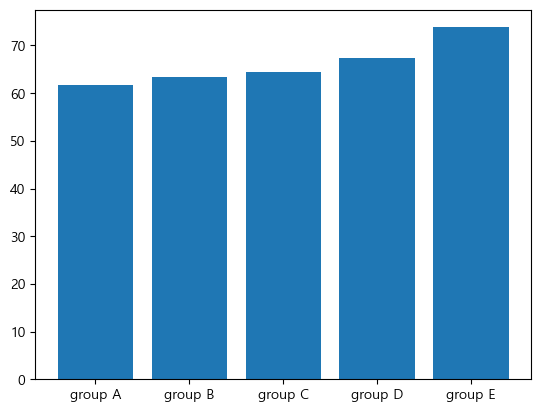

In [7]:
# bar() 함수로 막대그래프 생성
plt.bar(x=g_sp['race/ethnicity'], height=g_sp['math score'])
plt.show()

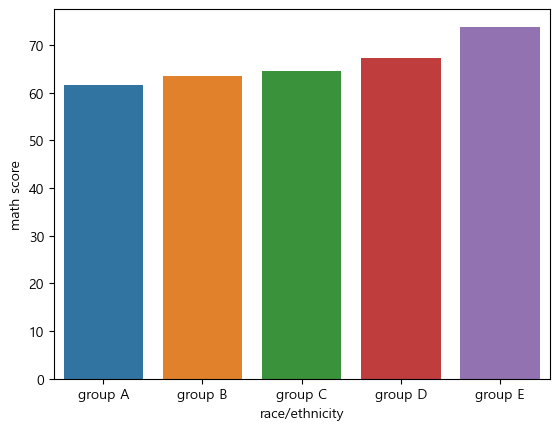

In [8]:
# barplot() 함수로 막대그래프 생성
sns.barplot(data = g_sp, x = 'race/ethnicity', y='math score')
plt.show()

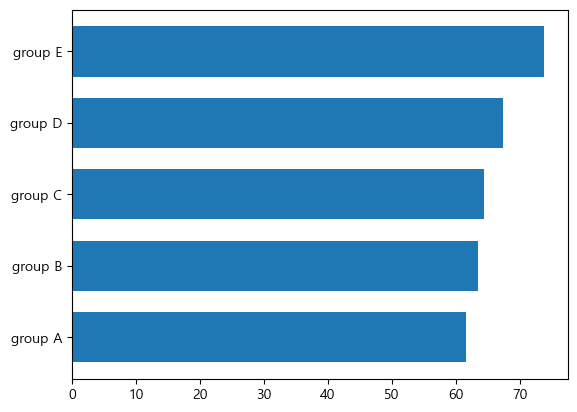

In [9]:
# barh() 함수로 수평 막대그래프 생성
plt.barh(y=g_sp['race/ethnicity'], width=g_sp['math score'] , height=0.7)
plt.show()

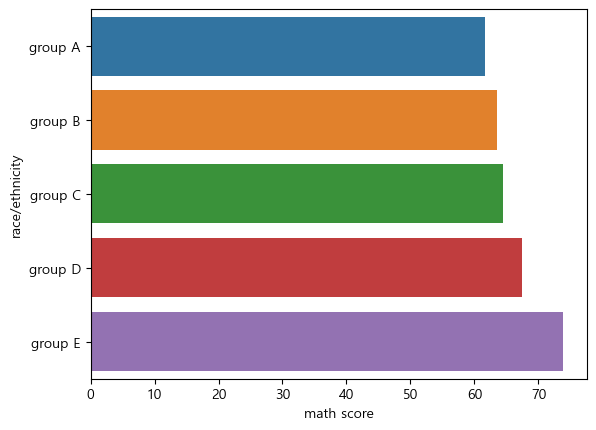

In [10]:
sns.barplot(data = g_sp, y='race/ethnicity', x='math score')
plt.show()

#### [실습] df_tsb 데이터에서 호선 별로 승차 이용객수의 평균을 막대그래프로 출력

In [124]:
df_tsb = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_tsb.head()

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046



### 1.2. 선그래프
두변수를 선택하여 **matplotlib**의 *plot()* 또는 **seaborn**의 *lineplot()* 를 활용하여 선그래프 생성

In [11]:
df_subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2021-07-01,중앙선,상봉(시외버스터미널),6102,6098,2021-07-04
1,2021-07-01,중앙선,망우,7706,7633,2021-07-04
2,2021-07-01,중앙선,양원,1987,2052,2021-07-04
3,2021-07-01,중앙선,구리,13576,13748,2021-07-04
4,2021-07-01,중앙선,도농,10145,9146,2021-07-04


In [12]:
# 선그래프 표현을 위한 데이터 집계
g_subway = df_subway[['사용일자','승차총승객수']].groupby(['사용일자']).mean()
g_subway.head()

,승차총승객수
사용일자,
2021-07-01,11243.038143
2021-07-02,11695.148333
2021-07-03,7277.855000
2021-07-04,4810.669435
2021-07-05,11148.178333


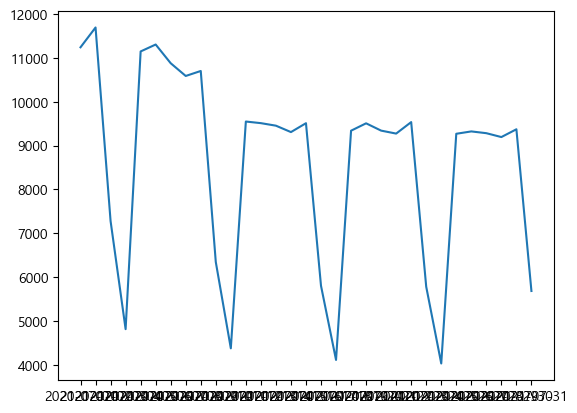

In [13]:
# bar() 함수로 막대그래프 생성
x = g_subway.index
y = g_subway['승차총승객수']
plt.plot(x, y)
plt.show()


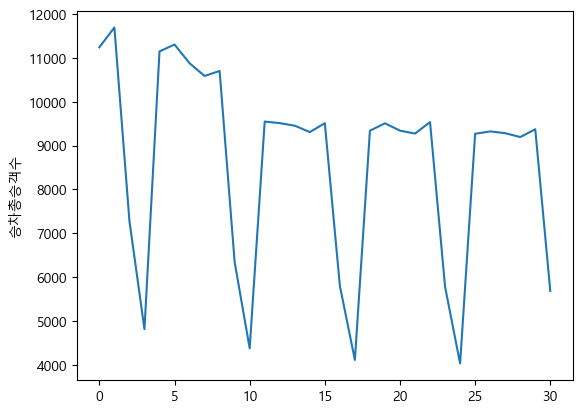

In [14]:
# barplot() 함수로 막대그래프 생성
x = range(len(g_subway.index))
g = sns.lineplot(data = g_subway, x = x, y='승차총승객수')
plt.show()

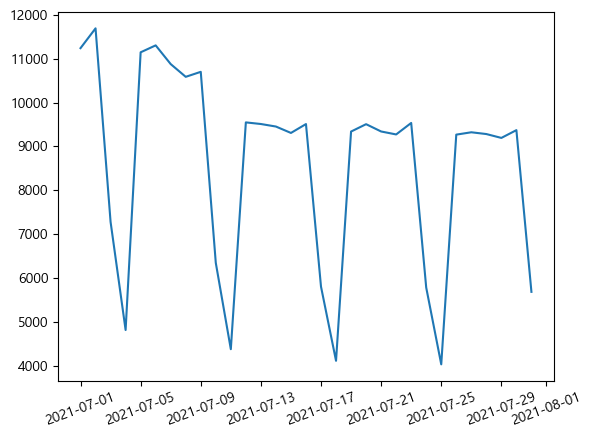

In [18]:
g_subway = df_subway.groupby('사용일자',as_index = False)['승차총승객수'].mean()

x = g_subway['사용일자'].astype('datetime64')
y = g_subway['승차총승객수']
plt.plot(x, y)
plt.xticks(rotation=20)
plt.show()

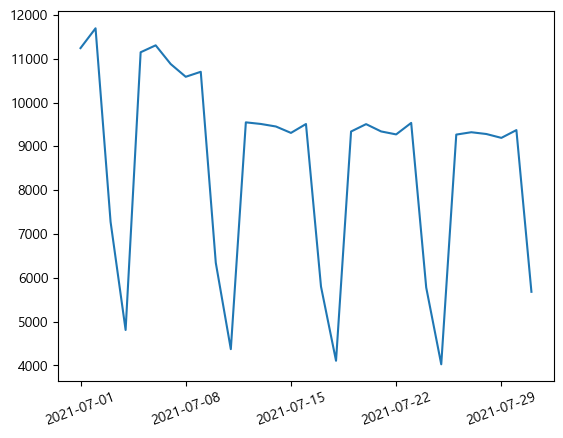

In [15]:
# xticks() 함수로 눈금 표현 수정
x = g_subway.index
y = g_subway['승차총승객수']
xtick = [xt for xt in range(len(x)) if xt % 7 == 0]
labels = [g_subway.index[xt] for xt in xtick]

plt.plot(x, y)
plt.xticks(xtick, labels,rotation=20)
plt.show()

#### [실습]  df_tsb 데이터에서 '2022-06-01'~'2022-06-30' 날짜 사이의 이용객수를 합계하여 선그래프로 출력 (x축 : 날짜, y축 이용객수합계)

In [19]:
df_tsb = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_tsb.head()

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046



### 1.3. 산점도그래프
두변수 이상을 선택하여 **matplotlib**의 *scatter()* 또는 **seaborn**의 *scatterplot()* 를 활용하여 산점도그래프 생성

In [80]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


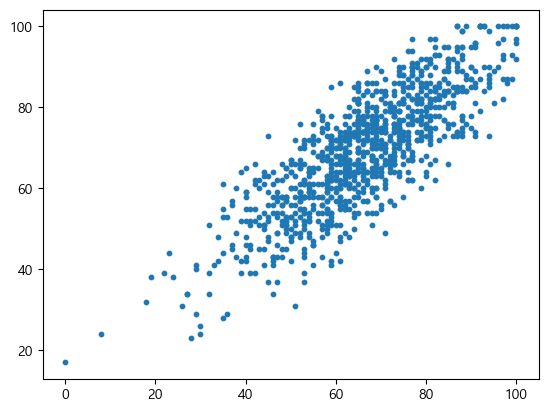

In [99]:
# scatter() 함수로 산점도 그래프 생성

plt.scatter(x=df_sp['math score'], y=df_sp['reading score'], s=10)
plt.show()

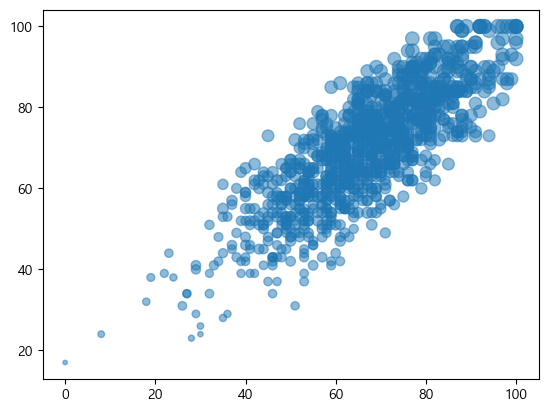

In [192]:
# 점의 크기도 변수를 할당할 수 있음
x = df_sp['math score']
y = df_sp['reading score']
s = df_sp['writing score']
plt.scatter(x=x, y=y, s=s, alpha=0.5)
plt.show()

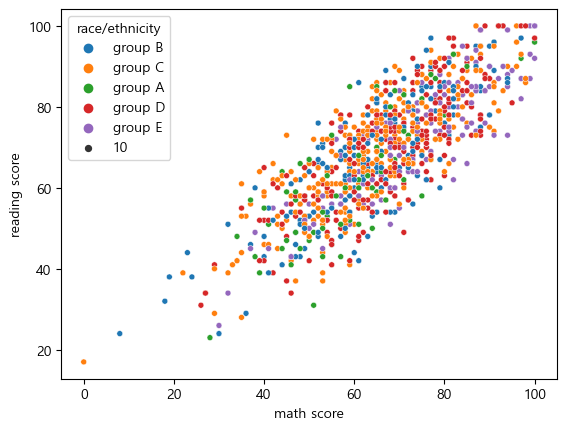

In [196]:
# scatterplot() 함수로 산점도 그래프 생성

sns.scatterplot(data=df_sp, x='math score', y='reading score', size=10,hue='race/ethnicity')
plt.show()

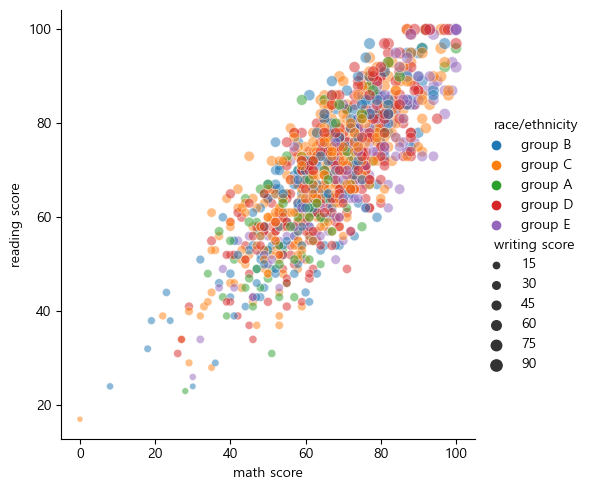

In [198]:
# relplot() 함수로 산점도 그래프 생성

sns.relplot(kind='scatter',data=df_sp, x='math score', y='reading score', 
            size='writing score', hue='race/ethnicity', alpha=0.5)
plt.show()

In [213]:
# 산점도의 분포는 상관관계를 따름
# corr()를 이용하여 상관관계 파악
df_sp[['math score','reading score']].corr()

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


#### [실습] df_subway 데이터에서 승차총승객수와 하차총승객수에 대한 산점도 그래프를 그리고 노선명별로 색상을 다르게 표현

In [22]:
df_subway = pd.read_csv('./data/CARD_SUBWAY_MONTH_202107.csv', encoding='CP949')
df_subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210701,중앙선,상봉(시외버스터미널),6102,6098,20210704
1,20210701,중앙선,망우,7706,7633,20210704
2,20210701,중앙선,양원,1987,2052,20210704
3,20210701,중앙선,구리,13576,13748,20210704
4,20210701,중앙선,도농,10145,9146,20210704



### 1.4. 여러 그래프
그래프가 그려지는 표는 Axes이며 Axes는 Figure에 여러개가 그려질수 있음

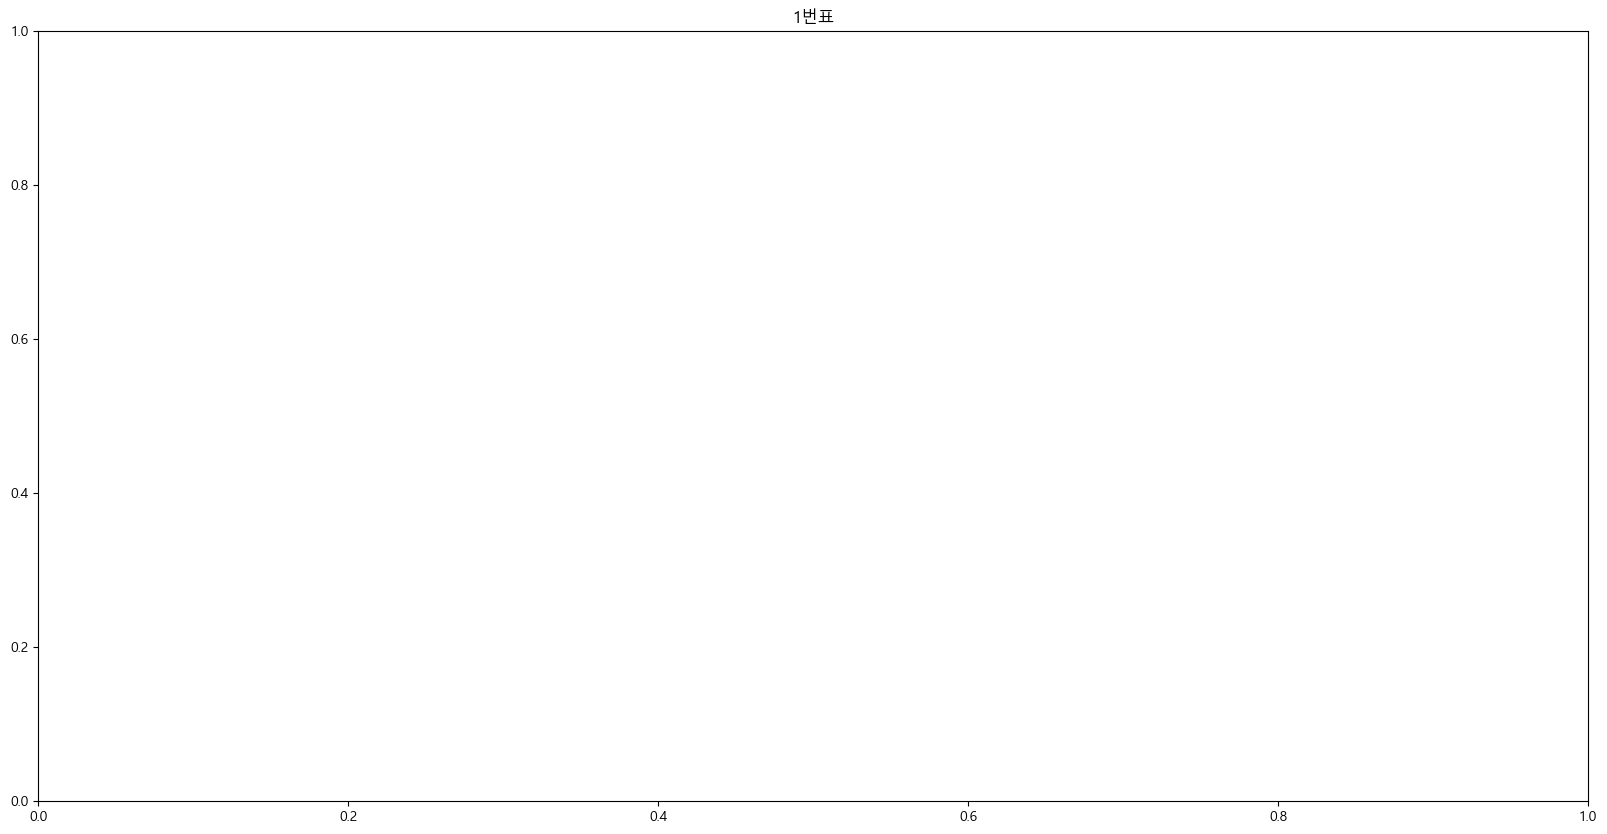

In [20]:
# subplots() 또는 figure 으로 Figure 정의
plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.set_title('1번표')
plt.show()

In [6]:
g_sp = df_sp[['race/ethnicity','math score','reading score']].groupby('race/ethnicity').mean()

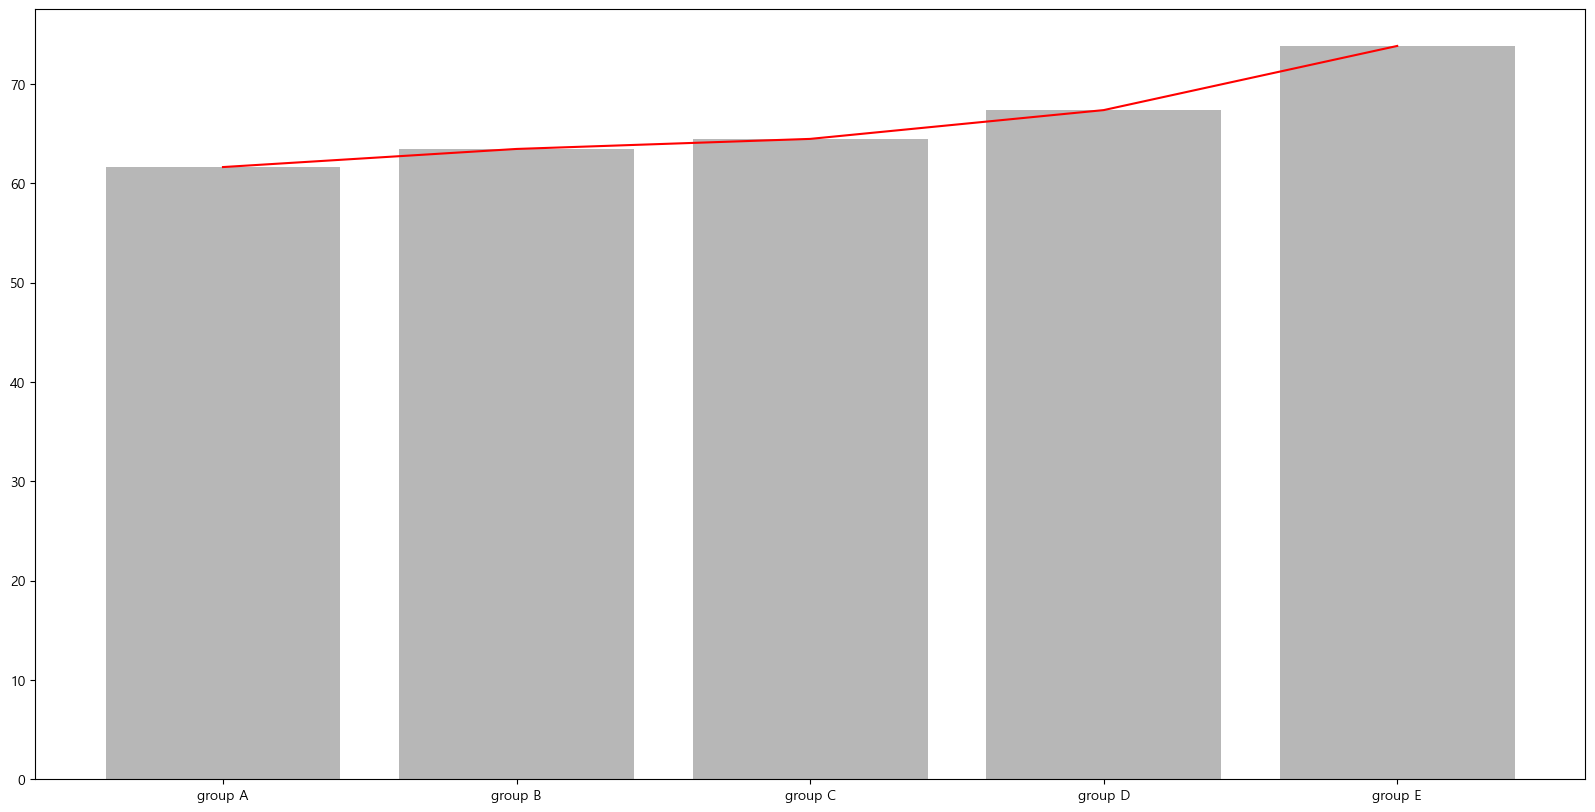

In [18]:
# 하나의 표안에 두개의 그래프 그리기
plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(x=g_sp.index, height=g_sp['math score'], color = '#B7B7B7')
ax.plot(g_sp.index, g_sp['math score'], color = 'red')
plt.show()

In [19]:
g_all = df_sp.groupby('race/ethnicity').mean()
g_all

C:\Users\trave\AppData\Local\Temp\ipykernel_3568\3408925058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g_all = df_sp.groupby('race/ethnicity').mean()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


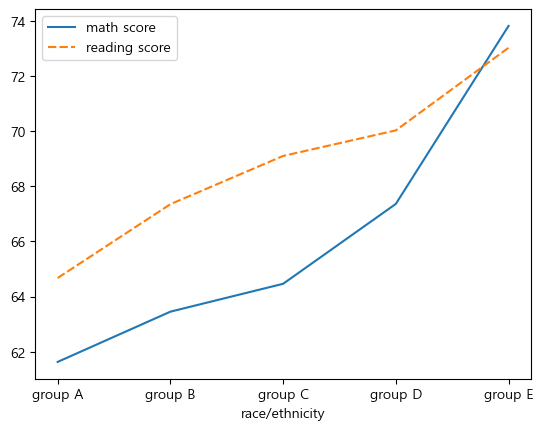

In [8]:
# 데이터구조에 따라 seaborn으로 간단하게 두개의 선그래프 작성
ax = plt.subplot()
sns.lineplot(data = g_sp, ax = ax)
plt.show()

math score
reading score
writing score


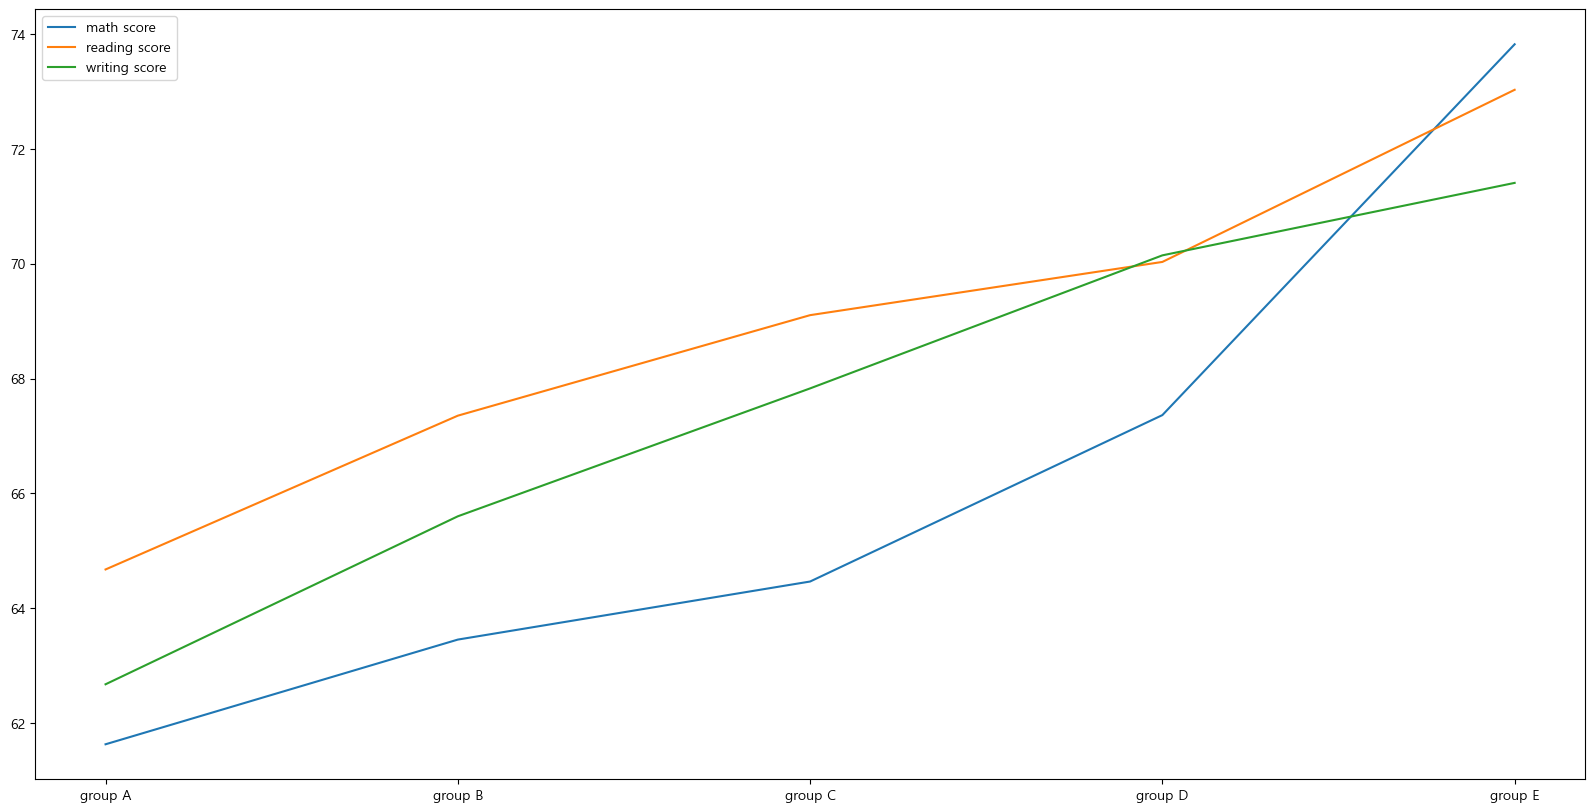

In [22]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

for col in g_all:
    print(col)
    ax.plot(g_all.index, g_all[col], label = col)
ax.legend()
plt.show()

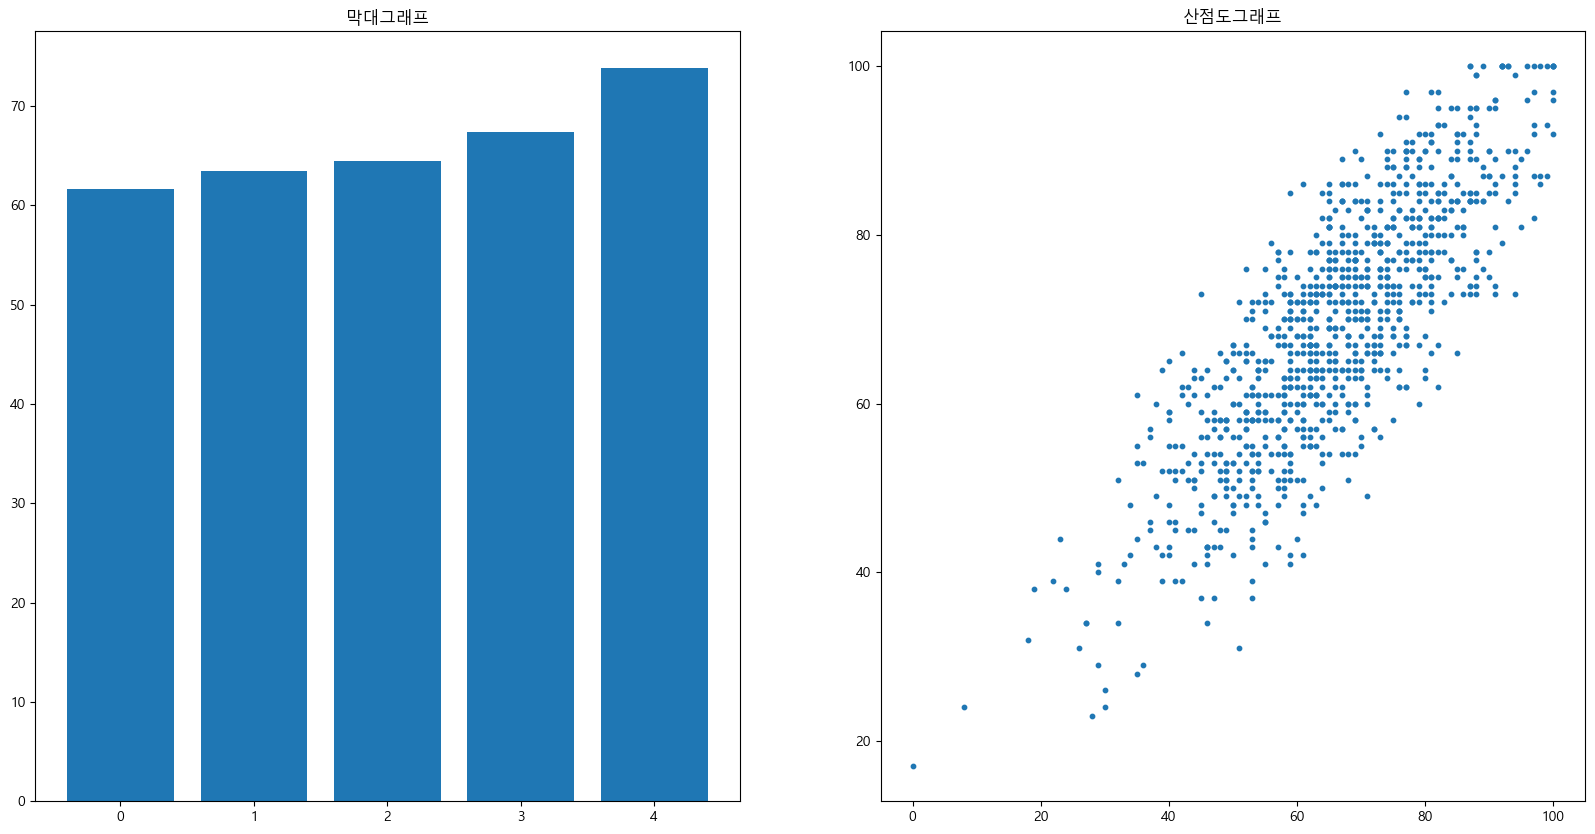

In [21]:
# 여러개의 Axes 가져오기
#     subplot(row, col, index)
plt.figure(figsize = (20,10))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(x=g_sp.index, height=g_sp['math score'])
ax1.set_title('막대그래프')

ax2.scatter(x=df_sp['math score'], y=df_sp['reading score'], s=10)
ax2.set_title('산점도그래프')

plt.show()

<br>

## 2. 특수 그래프 그리기

**matplotlib** 과 **seaborn**은 히스토그램, 히트맵, 상자그림 등 특수한 목적을 가진 통계 그래프를 제공


In [11]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_ins = pd.read_csv('data/insurance.csv')
df_tp = pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')

<br>

### 2.1. 히스토그램
**matplotlib** 과 **seaborn**은 데이터의 분포를 확인할 수 있는 히스토그램을 제공

In [229]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


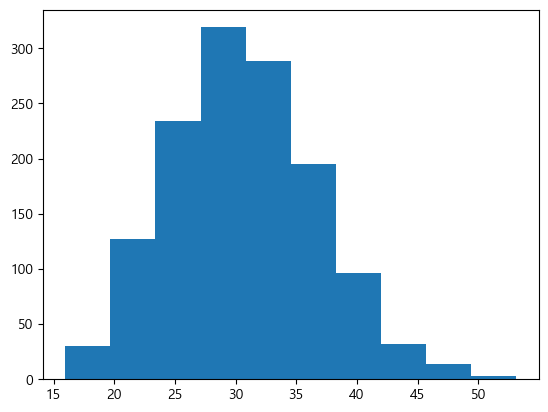

In [230]:
# hist()을 활용한 히스토그램
plt.hist(df_ins['bmi'])
plt.show()

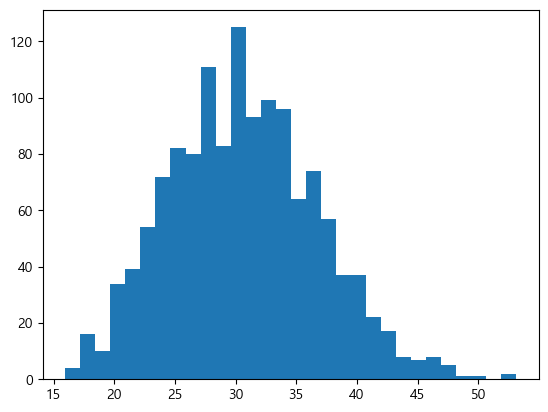

In [231]:
# bins 인자로 표현범위 조정
plt.hist(df_ins['bmi'],bins=30)
plt.show()

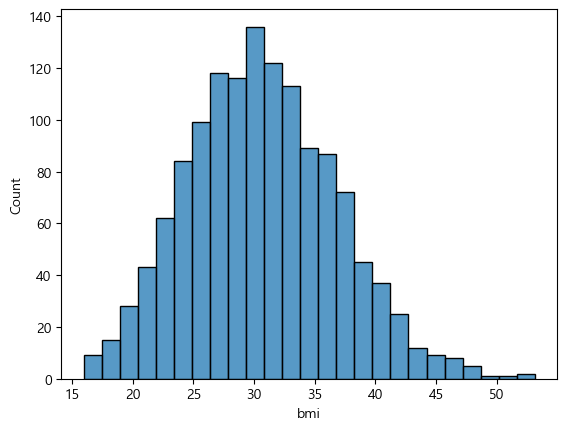

In [232]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='bmi')
plt.show()

<AxesSubplot: xlabel='bmi', ylabel='Count'>

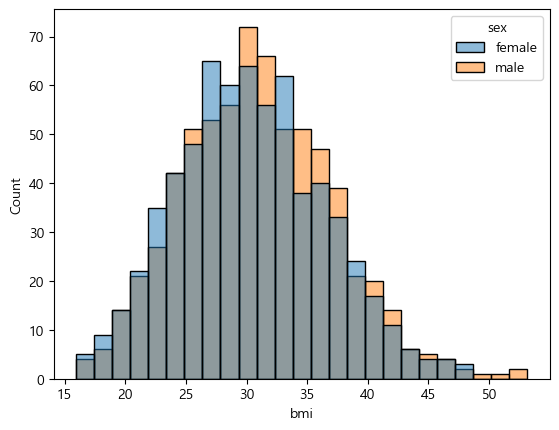

In [233]:
sns.histplot(data=df_ins, 
             x = 'bmi',
             hue='sex')

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



<br>

### 2.2. 히트맵
**seaborn**은 테이블형(매트릭스)의 데이터를 시각화 하는 히트맵 *heatmap()* 제공

In [234]:
df_tp.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327


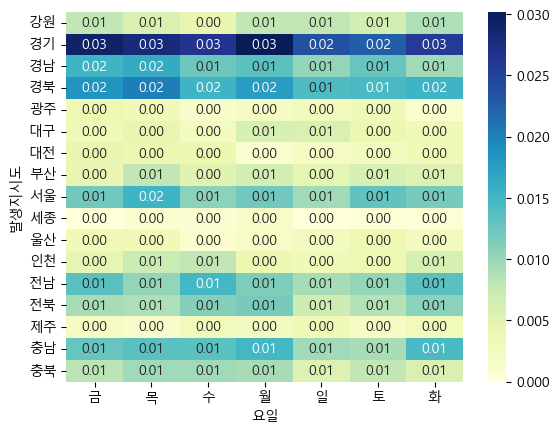

In [15]:
# crosstab()과 heatmap()을 활용한 백분율 히트맵
#     cmap : 색상표
#     annot : 데이터값 표현
#     fmt='.2f' : 소수점 표현
ctab = pd.crosstab(df_tp['발생지시도'], df_tp['요일'], normalize='all')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

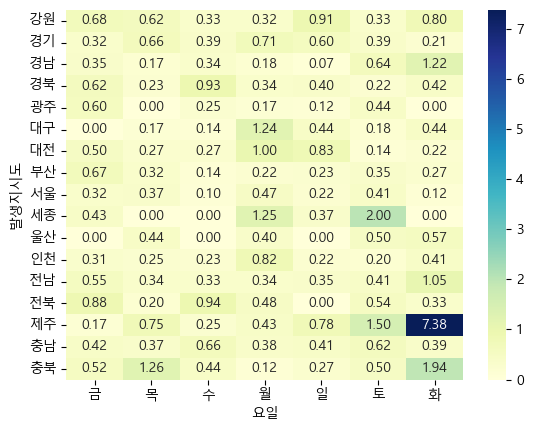

In [29]:
# pivot_table()과 heatmap()을 활용한 히트맵
import numpy as np
pivot = pd.pivot_table(df_tp, index='발생지시도', columns='요일', values='부상자수', aggfunc=np.mean)
pivot = pivot.fillna(pivot.mean())
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 전체 백분율을 나타내는 히트맵 출력 (전체 총합이 1인 백분율)
2. 1.의 방법에서 race/ethnicity의 백분율을 parental level of education의 범주별로 나타내는 히트맵 출력(하나의 race/ethnicity 총합이 1인 백분율)
3. df_sp에서 'race/ethnicity'와 'parental level of education'에대한 'math score'의 평균을 나타내는 피벗테이블 생성후 히트맵으로 출력 

In [237]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>

### 2.3. 상자그림
**matplotlib** 과 **seaborn**은 사분위를 표현해주는 상자그림을 그릴수 있음 *boxplot()*

사분위수(quartile)
- 최솟값(minimum, 0%)
- Q1(1st Quartile, 25%)
- 중앙값(median, 50%)
- Q3(3rd Quartile, 75%)
- 최댓값(maximum, 100%)

In [241]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [242]:
# 사분위는 pandas의 quantile 함수로 값만 계산 가능
df_ins[['age','bmi']].quantile(0.75) # 75%이므로 Q3


age    51.00000
bmi    34.69375
Name: 0.75, dtype: float64

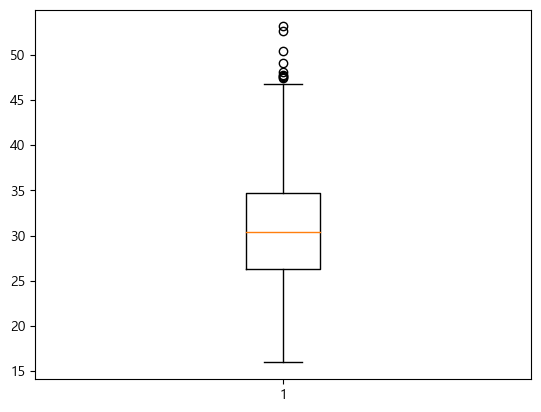

In [243]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.boxplot(df_ins['bmi'])
plt.show()

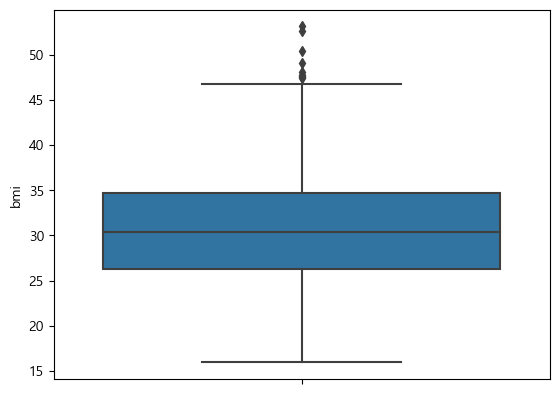

In [244]:
# seaborn의 boxplot()으로 상자그림 그리기
sns.boxplot(data=df_ins, y='bmi')
plt.show()

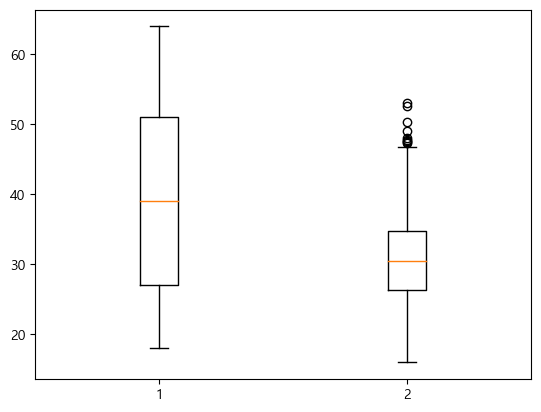

In [245]:
# 여러개의 상자그림 그리기
plt.boxplot(df_ins[['age','bmi']])
plt.show()

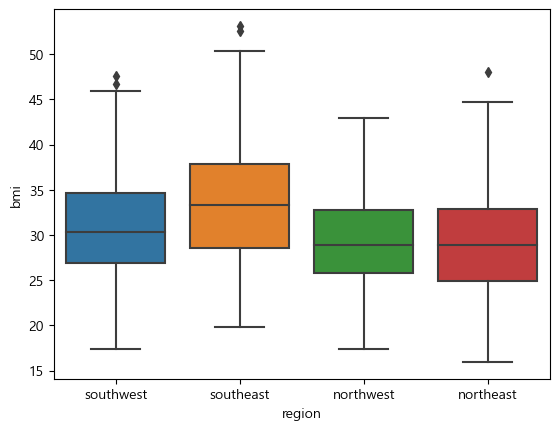

In [246]:
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi')
plt.show()

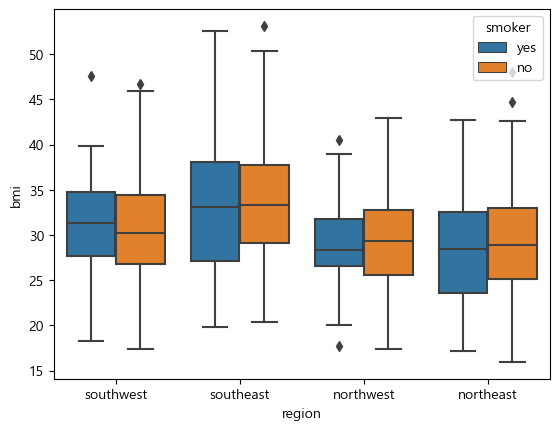

In [247]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi',
            hue='smoker')
plt.show()

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [참고] 결과 그래프의 저장
>*savefig()* 함수로 그래프를 저장 가능

In [248]:
# 폴더 생성
%mkdir result

하위 디렉터리 또는 파일 result이(가) 이미 있습니다.


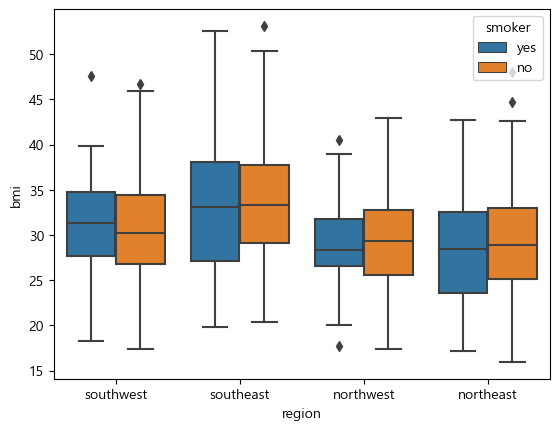

In [249]:
# savefig()을 활용한 그래프 저장
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi',
            hue='smoker')
plt.savefig('plot1.jpg')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'math score'와 'reading score'의 상자그림을 하나의 표안에 그리기 (matplotlib)
2. df_sp에서 'race/ethnicity'별 'math score'의 상자그림 하나의 표안에 그리기 (seaborn)



In [32]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>


#### [실습]

1. df_tsb에서 '호선'별 '이용객수'의 상자그림을 '구분'으로 나누어 하나의 표안에 그리기
2.'날짜'로부터 연-월 만 표기되는 '연월'컬럼을 만들고 '이용객수'를 1000단위의 표현으로 바꾸기(소수여도 됨)
3. 2.번의 '연월' 과 '호선'별 '이용객수'평균을 나타내는 피벗테이블을 만들고 히트맵으로 출력 (소수점 둘째자리까지)


<br>
<hr>
<br>

## 8. 반응형 그래프의 활용

**plotly**를 활용해서 반응형 그래프를 그려서 탐색적 데이터 분석(EDA) 과정에서 유용하게 활용 가능

* 참고: [Plotly](https://plotly.com/python/)

<AxesSubplot: xlabel='bmi', ylabel='charges'>

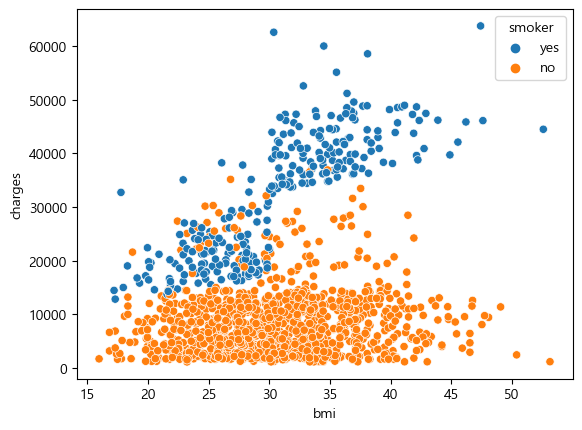

In [30]:
# seaborn을 활용한 산점도 
sns.scatterplot(data=df_ins, 
                x='bmi',
                y='charges', 
                hue='smoker')

In [31]:
import plotly.express as px 
px.scatter(df_ins,
           x='bmi', 
           y='charges', 
           color='smoker')

ModuleNotFoundError: No module named 'plotly'

#### End of script